# **資料預處理**



In [1]:
import tensorflow as tf

In [2]:
tf.__version__

'2.18.0'

In [3]:
import numpy as np

In [4]:
import pandas as pd

In [5]:
import matplotlib.pyplot as plt

In [6]:
from tensorflow.keras import utils  #用於分類資料轉換等 Keras 工具
np.random.seed(10) #設定隨機種子，讓每次程式產生的隨機值都一致

In [7]:
from tensorflow.keras.datasets import fashion_mnist
(x_train_image,y_train_label),\
(x_test_image,y_test_label)= fashion_mnist.load_data()

"""
          訓練資料                      測試資料
(x_train_image,y_train_label),(x_test_image,y_test_label)
      輸入         輸出           輸入         輸出

載入 MNIST 資料集，這是含有 28×28 灰階手寫數字的圖像資料集（0～9）。

x_train_image：訓練圖片（60000 筆）

y_train_label：訓練標籤（60000 筆）

x_test_image：測試圖片（10000 筆）

y_test_label：測試標籤（10000 筆）

"""

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


'\n          訓練資料                      測試資料\n(x_train_image,y_train_label),(x_test_image,y_test_label)\n      輸入         輸出           輸入         輸出\n\n載入 MNIST 資料集，這是含有 28×28 灰階手寫數字的圖像資料集（0～9）。\n\nx_train_image：訓練圖片（60000 筆）\n\ny_train_label：訓練標籤（60000 筆）\n\nx_test_image：測試圖片（10000 筆）\n\ny_test_label：測試標籤（10000 筆）\n\n'

In [8]:
x_Train = x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

"""
將每張 28×28 的影像展平為 784 維向量（28×28 = 784）

同時轉換為 float32 型別，以利後續處理與訓練。
"""

'\n將每張 28×28 的影像展平為 784 維向量（28×28 = 784）\n\n同時轉換為 float32 型別，以利後續處理與訓練。\n'

In [9]:
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255

#將像素值從 [0, 255] 範圍 正規化到 [0, 1]，這有助於神經網路更快收斂且更穩定。

In [10]:
y_Train_OneHot = utils.to_categorical(y_train_label)
y_Test_OneHot = utils.to_categorical(y_test_label)

"""
將 數字標籤（0～9）轉為 One-Hot 編碼，例如：

3 → [0 0 0 1 0 0 0 0 0 0]

9 → [0 0 0 0 0 0 0 0 0 1]

One-Hot 是訓練分類網路時常見的做法。
"""

'\n將 數字標籤（0～9）轉為 One-Hot 編碼，例如：\n\n3 → [0 0 0 1 0 0 0 0 0 0]\n\n9 → [0 0 0 0 0 0 0 0 0 1]\n\nOne-Hot 是訓練分類網路時常見的做法。\n'

# **建立模型**

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.layers import Dropout
from keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [12]:
lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,       # 每次下降50%
    patience=3,       # 如果3個epoch沒進步就調
    verbose=1,
    min_lr=1e-6       # 不會低於這個值
)

In [13]:
model = Sequential()

In [14]:
model.add(Dense(
    units=1024,                   # 該層的神經元數量為 256
    input_dim=784,              # 輸入資料的維度是 784（常見於 28x28 圖片，例如 MNIST）
    kernel_initializer='normal',# 權重初始化方式為常態分布（mean=0, std=1）
    activation='relu'))         # 啟用函數使用 ReLU（修正線性單元）

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.add(Dropout(0.15))

In [16]:
model.add(Dense(
    units = 512,
    kernel_initializer='normal',
    activation='relu'))

In [17]:
model.add(Dropout(0.1))

In [18]:
model.add(Dense(units=10,
                kernel_initializer='normal',
                activation='softmax'))

In [19]:
print(model.summary())  # 檢查用

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1024)           │       803,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,333,770 (5.09 MB)

 Trainable params: 1,333,770 (5.09 MB)

 Non-trainable params: 0 (0.00 B)

None


# **訓練模型**

In [20]:
model.compile(
    loss='categorical_crossentropy',  # 損失函數
    optimizer= Adam(learning_rate = 0.001),                 # 最佳化器
    metrics=['accuracy']             # 評估指標
)

In [21]:
train_history = model.fit(
    x = x_Train_normalize,         # 訓練資料（特徵）→ 已經標準化
    y = y_Train_OneHot,            # 訓練標籤（目標）→ One-hot 編碼
    validation_split = 0.2,        # 20% 訓練資料作為驗證資料（不用額外給 validation set）
    epochs = 40,                   # 訓練 40 輪（整份資料訓練 40 次）
    batch_size = 400,              # 每批次送入 400 筆資料
    verbose = 2,                   # 顯示訓練過程資訊（2 表示精簡模式：每輪顯示一行）
    callbacks=[lr_scheduler]
)

Epoch 1/40
120/120 - 11s - 92ms/step - accuracy: 0.8003 - loss: 0.5651 - val_accuracy: 0.8550 - val_loss: 0.4032 - learning_rate: 1.0000e-03
Epoch 2/40
120/120 - 9s - 75ms/step - accuracy: 0.8626 - loss: 0.3792 - val_accuracy: 0.8712 - val_loss: 0.3589 - learning_rate: 1.0000e-03
Epoch 3/40
120/120 - 11s - 93ms/step - accuracy: 0.8748 - loss: 0.3416 - val_accuracy: 0.8778 - val_loss: 0.3316 - learning_rate: 1.0000e-03
Epoch 4/40
120/120 - 11s - 92ms/step - accuracy: 0.8865 - loss: 0.3109 - val_accuracy: 0.8774 - val_loss: 0.3299 - learning_rate: 1.0000e-03
Epoch 5/40
120/120 - 10s - 85ms/step - accuracy: 0.8923 - loss: 0.2920 - val_accuracy: 0.8777 - val_loss: 0.3491 - learning_rate: 1.0000e-03
Epoch 6/40
120/120 - 9s - 74ms/step - accuracy: 0.8942 - loss: 0.2808 - val_accuracy: 0.8855 - val_loss: 0.3122 - learning_rate: 1.0000e-03
Epoch 7/40
120/120 - 9s - 74ms/step - accuracy: 0.8996 - loss: 0.2640 - val_accuracy: 0.8928 - val_loss: 0.2977 - learning_rate: 1.0000e-03
Epoch 8/40
120/1

# **以圖形顯示訓練過程**

In [22]:
train_history.history

{'accuracy': [0.8003333210945129,
  0.8626041412353516,
  0.874750018119812,
  0.8865000009536743,
  0.8923333287239075,
  0.8942291736602783,
  0.8995833396911621,
  0.9053750038146973,
  0.9072083234786987,
  0.9127083420753479,
  0.9246875047683716,
  0.9274791479110718,
  0.9321041703224182,
  0.932854175567627,
  0.9407291412353516,
  0.9423750042915344,
  0.9442499876022339,
  0.9462291598320007,
  0.9478958249092102,
  0.9523333311080933,
  0.9536041617393494,
  0.9551041722297668,
  0.9571874737739563,
  0.9580833315849304,
  0.9591666460037231,
  0.9600208401679993,
  0.961187481880188,
  0.9621666669845581,
  0.9619791507720947,
  0.9624583125114441,
  0.9617083072662354,
  0.9630625247955322,
  0.9636666774749756,
  0.964020848274231,
  0.9635833501815796,
  0.9629583358764648,
  0.9638749957084656,
  0.9631249904632568,
  0.9632708430290222,
  0.9637708067893982],
 'loss': [0.5650771260261536,
  0.37915515899658203,
  0.34158581495285034,
  0.31085509061813354,
  0.29198580

In [23]:
import matplotlib.pyplot as plt

# 畫出訓練過程每一個epoch訓練資料與驗證資料各自準確率(accuracy)的變化，或者損失誤差(loss)的變化
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

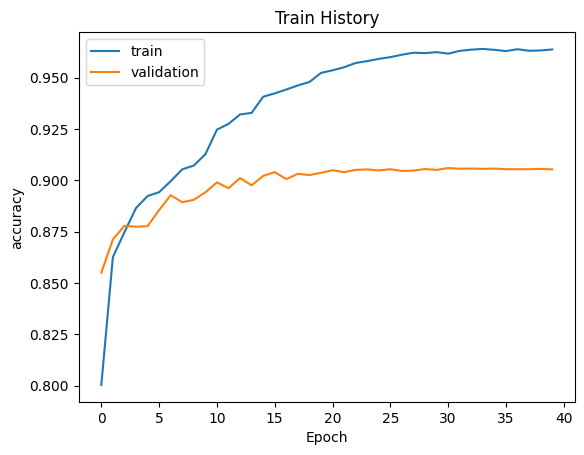

In [24]:
show_train_history(train_history,'accuracy','val_accuracy')

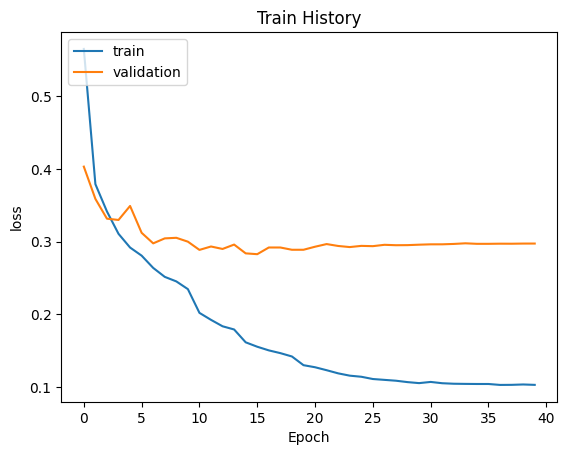

In [25]:
show_train_history(train_history,'loss','val_loss')

# **評估模型準確率**

In [26]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8985 - loss: 0.3329

accuracy= 0.8996999859809875


# **進行預測**

In [27]:
class_names = ["T-Shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [28]:
prediction=model.predict(x_Test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [29]:
# 10000個預測結果：二維陣列(10000, 10)，每一個預測結果:10個阿拉伯數字可能的機率
prediction.shape

(10000, 10)

In [30]:
# 第666號測試資料預測結果，數字7機率最高
prediction[666]

array([0.        , 0.        , 0.        , 0.99999994, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ],
      dtype=float32)

In [31]:
# 將機率最高的阿拉伯數字(7)找出來，作為預測結果(標籤)
predicted_lable = np.argmax(prediction[666])
predicted_lable

np.int64(3)

神經網路預測是： Dress
實際是： Dress


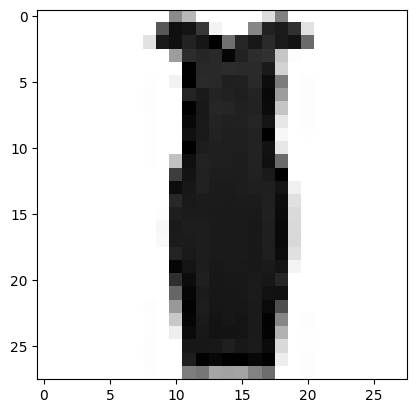

In [32]:
import matplotlib.pyplot as plt

print('神經網路預測是：', class_names[predicted_lable])
print('實際是：', class_names[y_test_label[666]])
plt.imshow(x_Test[666].reshape(28,28), cmap='Greys');  # 測試圖片需reshape為原來28x28

In [33]:
# 一次呈現數張測試資料(圖片)、預測結果與真實結果，最多25張，預設10張
def plot_images_labels_prediction(images, labels, prediction, idx, num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num > 25: num = 25
    for i in range(0, num):
        ax = plt.subplot(5, 5, 1 + i)
        ax.imshow(images[idx], cmap='binary')
        title = "label=" + str(class_names[labels[idx]]) + "\n"
        if len(prediction) > 0:
            title += "predict=" + str(class_names[np.argmax(prediction[idx])])
        ax.set_title(title, fontsize=10)
        ax.set_xticks([]); ax.set_yticks([])
        idx += 1
    plt.show()

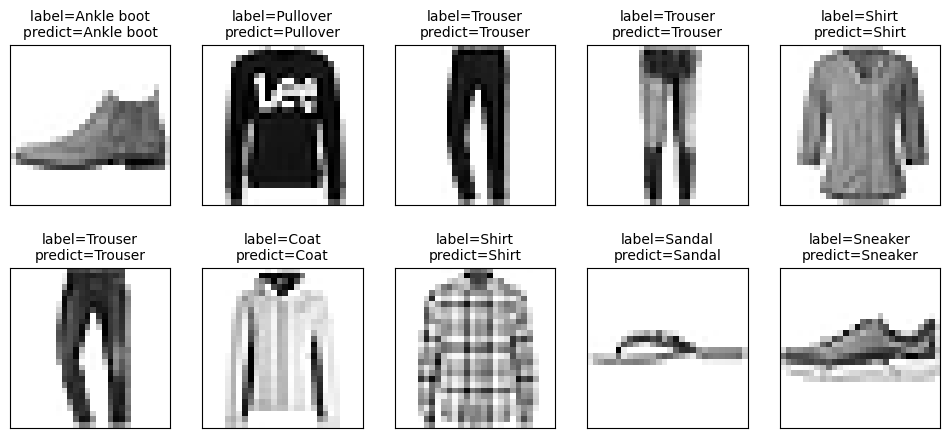

In [34]:
plot_images_labels_prediction(x_test_image,y_test_label,
                              prediction,idx=0)

# confusion matrix (混淆矩陣)

預測結果與真實結果相同或不同的情形

In [35]:
import pandas as pd
# 將10000個預測結果一一轉換為
predicted_labels = np.argmax(prediction, axis=1)

# Now use predicted_labels in crosstab
pd.crosstab(y_test_label, predicted_labels, rownames=['label'], colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,873,3,17,9,8,0,81,0,9,0
1,1,987,2,5,4,0,0,0,1,0
2,16,0,743,8,184,0,46,0,3,0
3,24,15,11,857,63,0,22,0,8,0
4,2,0,42,12,918,0,23,0,3,0
5,0,0,0,0,0,967,0,11,1,21
6,122,2,68,19,141,0,636,0,12,0
7,0,0,0,0,0,14,0,929,3,54
8,4,1,0,1,7,2,1,3,981,0


In [36]:
# 每一筆測試資料的真實結果標籤(label)與預測結果標籤(predict)的表格(df)

df = pd.DataFrame({'label': y_test_label, 'predict': predicted_labels})
df[:10] # 表格前10筆測試資料

,label,predict
0,9,9
1,2,2
2,1,1
3,1,1
4,6,6
5,1,1
6,4,4
7,6,6
8,5,5
9,7,7


In [37]:
df[(df.label==5)&(df.predict==3)]  # 真實標籤為5，卻預測為3

,label,predict


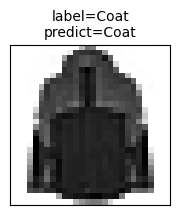

In [38]:
plot_images_labels_prediction(x_test_image,y_test_label
                              ,prediction,idx=340,num=1)

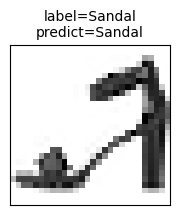

In [39]:
plot_images_labels_prediction(x_test_image,y_test_label
                              ,prediction,idx=1289,num=1)

In [40]:
from google.colab import drive